In [3]:
import librosa, librosa.display
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import scipy
import pandas as pd

In [4]:
def wave_length(data, zero_index, min_guess, max_guess): 
    #data should be an array of amplitudes? maybe at the main frequency?
    size = data.shape[0]
    xval = np.zeros(size, dtype=float, order='C')
    for i in range(0,size):
        xval[i] = i-zero_index
    
    #scale down data slowly
    scale = np.zeros(size, dtype=float, order='C')
    xval = np.zeros(size, dtype=float, order='C')
    for i in range(0,size):
        xval[i] = i-zero_index

        #creating a piecewise linear scaler that weights the frequencies near the maximum more
        if np.absolute(i-zero_index)<2*max_guess:
            scale[i] = 1
        elif np.absolute(i-zero_index)>6*max_guess:
            scale[i] = 0
        else:
            scale[i] = 1.5-np.absolute(i-zero_index)/(4*max_guess)
    scaled_data = np.multiply(data,scale)
    norm = np.dot(scaled_data,scaled_data)
    
    #find best fitting wave
    best_fit = 0
    wavelength = 0
    wave_fit = 0
    #if someone wants you could try and replace this with a binary search for speed
    for i in range(min_guess,max_guess+1):
        #create cos values
        cosval = np.cos((2*math.pi/i)*(xval))
        
        #integrate data values
        wave_fit = np.dot(cosval,scaled_data)/np.dot(cosval,cosval)
        if wave_fit> best_fit:
            best_fit = wave_fit
            wavelength = i
    return wavelength, best_fit/norm

In [5]:
def wave_guess(D):
    max_value = np.max(D)
    min_value = np.min(D)
    zero_index = np.unravel_index(np.argmax(D), D.shape)[0]
    print (zero_index)
    threshold_end = (max_value - min_value) * .3 + min_value # set the amplitude threshold that marks the end of a syllable
    threshold_start = (max_value - min_value) * .7 + min_value# sets the amplitude threshold that marks the start of the next syllable    

    i=1
    bool1 = True
    while bool1:
        if zero_index+i>len(D)-2:
            print ('never reached end threshold')
            return None
        elif data[zero_index + i] <threshold_end:
            bool1 = False
        i = i+1
    
    bool1 = True
    while bool1: 
        if zero_index+i>len(D)-2:
            print ('never reached end threshold')
            return None
        elif data[zero_index + i] >threshold_start:
            bool1 = False
        i = i+1
    lower = i
    
    bool1 = True
    while bool1:
        if zero_index+i>len(D)-2:
            print ('never reached end threshold')
            return None
        elif data[zero_index + i] <threshold_end:
            bool1 = False
        i = i+1
    upper = i
    
    return zero_index, lower, upper

In [6]:
def fft_wavelength(data):
    data2 = data- data.mean()
    fft = scipy.fft.fft(data2)
    out = np.absolute(fft)
    return out

In [7]:
def remove_low(f):
    song, sr = librosa.load(f)
    D = np.abs(librosa.stft(song, n_fft=n_fft,  hop_length=hop_length))
    #FIND OUT HOW MANY FREQUENCIES WE REMOVED HERE!
    D=D[64:]
    return D

(431,)
(961, 431)


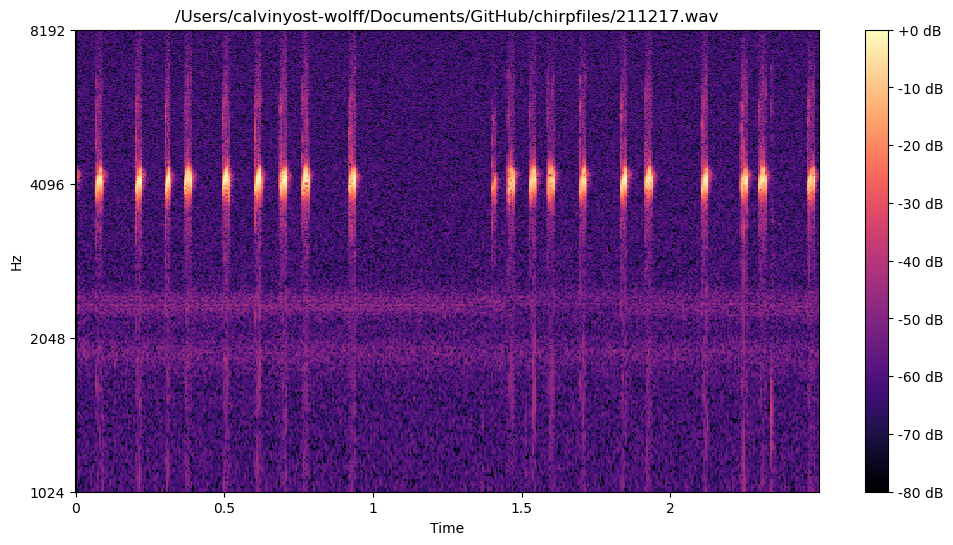

107
never reached end threshold


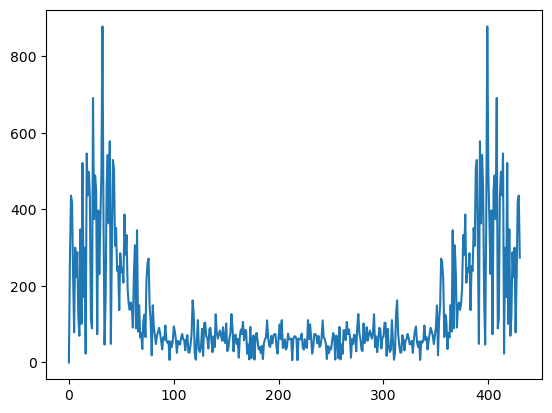

(32,)


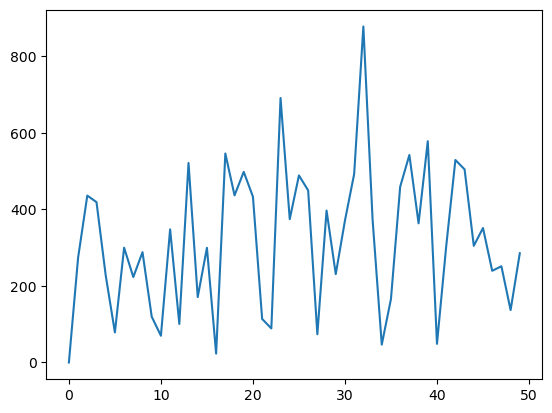

In [8]:
hop_length = 1024
n_fft = 2048
f = '/Users/calvinyost-wolff/Documents/GitHub/chirpfiles/211217.wav'
freq = 4096
D = remove_low(f)
data = D.sum(axis=0)
data = librosa.amplitude_to_db(data, ref=np.max)
print (data.shape)
DB = librosa.amplitude_to_db(D, ref=np.max)
print (DB.shape)
plt.figure(figsize=(12,6))
librosa.display.specshow(DB, hop_length=128, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.ylim(1024, 1024*8)
plt.title(str(f))
plt.show()
if wave_guess(data) != None:
    zero_index, min_guess, max_guess = wave_guess(data)
    print (zero_index, ',',min_guess, ',',max_guess)
    print (wave_length(data, zero_index, min_guess, max_guess))
    print (wave_length(data,zero_index,1,100))
fft = fft_wavelength(data)
plt.plot(fft)
plt.show()
print (np.unravel_index(np.argmax(fft), fft.shape))
plt.plot(fft[0:50])

(1, 862)
(431,)
(961, 431)


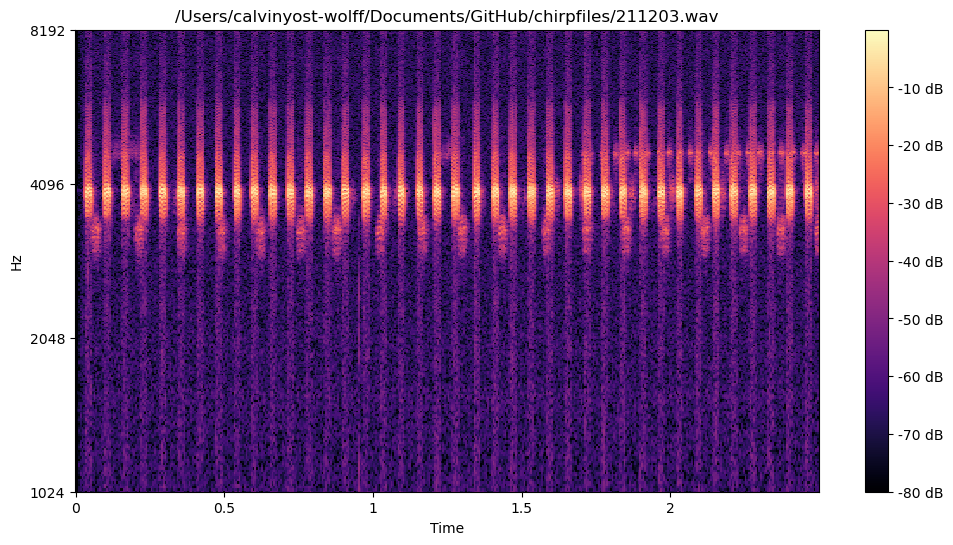

253
never reached end threshold


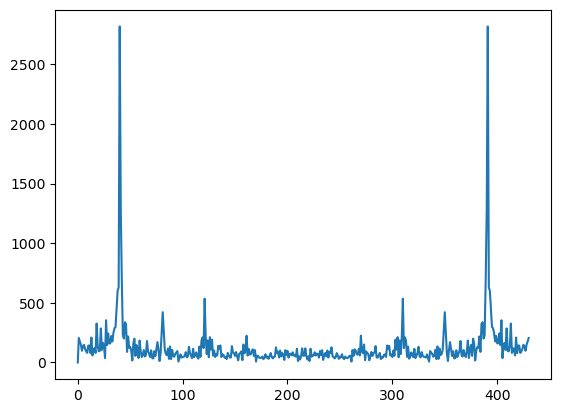

(40,)


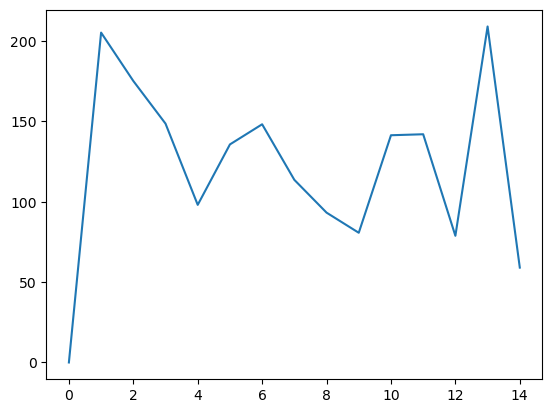

In [14]:
hop_length = 1024
n_fft = 2048
f = '/Users/calvinyost-wolff/Documents/GitHub/chirpfiles/211203.wav'
freq = 4096
song, sr = librosa.load(f)
zeros = librosa.feature.zero_crossing_rate(song)
print (zeros.shape)

D = remove_low(f)
data = D.sum(axis=0)
data = librosa.amplitude_to_db(data, ref=np.max)
print (data.shape)
DB = librosa.amplitude_to_db(D, ref=np.max)
print (DB.shape)
plt.figure(figsize=(12,6))
librosa.display.specshow(DB, hop_length=128, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.ylim(1024, 1024*8)
plt.title(str(f))
plt.show()
if wave_guess(data) != None:
    zero_index, min_guess, max_guess = wave_guess(data)
    print (zero_index, ',',min_guess, ',',max_guess)
    print (wave_length(data, zero_index, min_guess, max_guess))
    print (wave_length(data,zero_index,1,100))
    print ('ouput should be 11 for high freq or 23 for a specific other frequency')
fft = fft_wavelength(data)
plt.plot(fft)
plt.show()
print (np.unravel_index(np.argmax(fft), fft.shape))
plt.plot(fft[0:15])

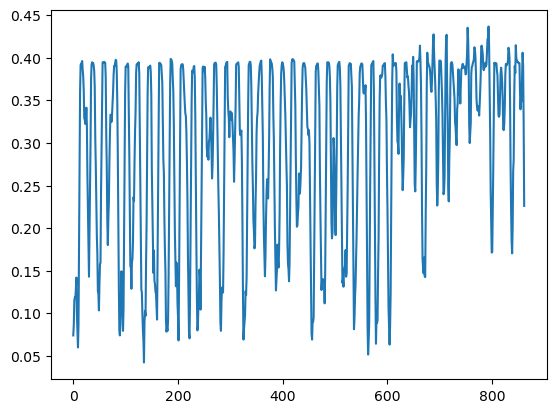

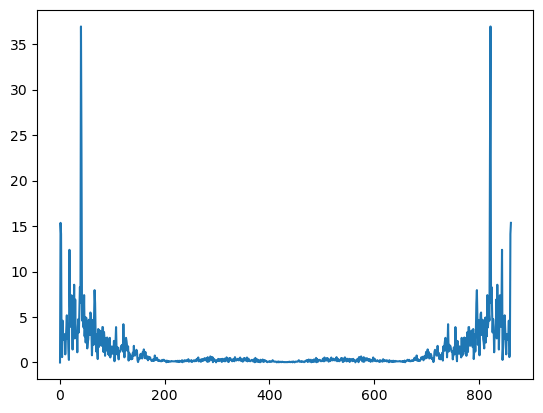

(40,)


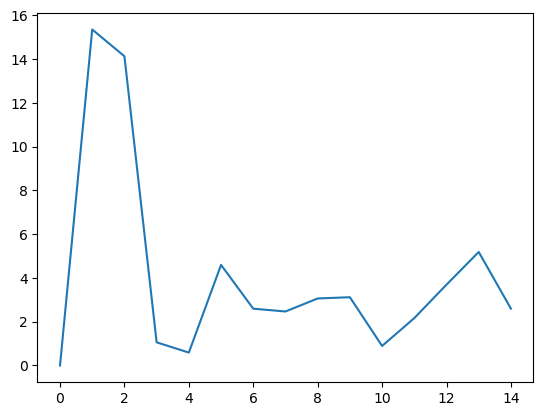

In [20]:
plt.plot(zeros[0])
plt.show()
fft = fft_wavelength(zeros[0])
plt.plot(fft)
plt.show()
print (np.unravel_index(np.argmax(fft), fft.shape))
plt.plot(fft[0:15])

In [ ]:
def fft_file(f):
    D = remove_low(f)
    if D.shape[1] != 431:
        return [0]
    data = D.sum(axis=0)
    data2 = data- data.mean()
    fft = scipy.fft.fft(data2)
    out2 = np.absolute(fft)
    return out2

def get_fft_DB(directory):
    df = pd.read_csv('MLNS_Insects_fams_05212024.csv')

    columns = ['critter_name']
    for i in range(0,431):
        columns.append(i)
    
    out = pd.DataFrame(columns = columns)
    i = 0
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        # checking if it is a file
        i=i+1
        if i%100 == 0:
            print (100*i/len(os.listdir(directory)),' percent done')
        if os.path.isfile(f):
            if os.path.getsize(f) < 881000:
                continue
            #recover type
            file_name = float(filter_non_digits(f))
            critter_name = df.loc[df.cat_num==file_name].critter_name
            
            #recover fft
            fft = fft_file(f)
            if fft.shape[0] == 431:
                new_dict = {'critter_name': critter_name}
                for i in range(0,431):
                    new_dict[i] = fft[i]
                new_row = pd.DataFrame(new_dict)
                out = pd.concat([out, new_row])
    return out

In [ ]:
def filter_non_digits(string):
    result = ''
    for char in string:
        if char in '1234567890':
            result += char
    return result 

In [ ]:
directory = '/Users/calvinyost-wolff/Documents/GitHub/chirpfiles/NoTalk'
hop_length = 1024
n_fft = 2048

data = get_fft_DB(directory)

In [ ]:
for col in data.columns:
    plt.figure(figsize=(8,5))


    plt.hist(data.loc[data.critter_name=='cricket', col].values,
                color='blue',
                alpha=.7,
                label="Cricket")

    plt.hist(data.loc[data.critter_name=='cicada', col].values,
                color='black',
                alpha=1,
                hatch = '\\',
                edgecolor='black',
                label="Cicada")

    plt.hist(data.loc[data.critter_name=='kaydid', col].values,
            color='red',
            alpha=.5,
            hatch = '//',
            edgecolor='black',
            label="Kaydid")

    plt.xlabel(col, fontsize=14)
    plt.legend(fontsize=14)

    plt.show()

In [ ]:
data.head(5)

In [ ]:
for i in range(0,43):
    string = 'range ' + str(10*i) + ' to ' + str((10*i+9)) 
    data[string] = data[10*i] + data[10*i+1] + data[10*i+2]+ data[10*i+3]+ data[10*i+4]+ data[10*i+5]+ data[10*i+6]+ data[10*i+7] + data[10*i+8]+ data[10*i+9]
    

In [ ]:
data.head(5)

In [ ]:
for col in data.columns:
    if type(col) != int:
        plt.figure(figsize=(8,5))
    
    
        plt.hist(data.loc[data.critter_name=='cricket', col].values,
                    color='blue',
                    alpha=.7,
                    label="Cricket")
    
        plt.hist(data.loc[data.critter_name=='cicada', col].values,
                    color='black',
                    alpha=1,
                    hatch = '\\',
                    edgecolor='black',
                    label="Cicada")
    
        plt.hist(data.loc[data.critter_name=='kaydid', col].values,
                color='red',
                alpha=.5,
                hatch = '//',
                edgecolor='black',
                label="Kaydid")
    
        plt.xlabel(col, fontsize=14)
        plt.legend(fontsize=14)
    
        plt.show()

In [ ]:
import seaborn as sns
sns.pairplot(data = data_normalized,
                x_vars = ['range 10 to 19'],
                y_vars = ['range 210 to 219'],
                hue = 'critter_name',
                plot_kws = {'alpha':.1})

plt.show()

In [ ]:
data['normalizer'] = 0
for i in range(0,431):
    data['normalizer'] = data['normalizer'] + data[i]
data.head(5)

In [ ]:
data_normalized = data

In [ ]:
print(data_normalized.groupby('critter_name')['range 30 to 39'].median())

In [ ]:
print(data_normalized.groupby('critter_name')['range 0 to 9'].median())

In [ ]:
print(data_normalized.groupby('critter_name')['range 10 to 19'].median())

In [ ]:
for col in data_normalized.columns[1:-1]:
    data_normalized[col] = data_normalized[col]/data_normalized['normalizer']

In [ ]:
data_normalized.head(5)

In [ ]:
for col in data_normalized.columns:
    if type(col) != int:
        plt.figure(figsize=(8,5))
    
    
        plt.hist(data.loc[data.critter_name=='cricket', col].values,
                    color='blue',
                    alpha=.7,
                    label="Cricket")
    
        plt.hist(data.loc[data.critter_name=='cicada', col].values,
                    color='black',
                    alpha=1,
                    hatch = '\\',
                    edgecolor='black',
                    label="Cicada")
    
        plt.hist(data.loc[data.critter_name=='kaydid', col].values,
                color='red',
                alpha=.5,
                hatch = '//',
                edgecolor='black',
                label="Kaydid")
    
        plt.xlabel(col, fontsize=14)
        plt.legend(fontsize=14)
    
        plt.show()

In [ ]:
print(data_normalized.groupby('critter_name')['range 0 to 9'].mean())

In [ ]:
print(data_normalized.groupby('critter_name')['range 10 to 19'].mean())

In [ ]:
print(data_normalized.groupby('critter_name')['range 20 to 29'].mean())

In [ ]:
for col in data_normalized.columns:
    if type(col) != int:
        plt.figure(figsize=(8,5))
        
        plt.hist(data.loc[data.critter_name=='cicada', col].values,
                color='black',
                alpha=1,
                hatch = '//',
                edgecolor='black',
                label="Cicada")
    
        plt.xlabel(col, fontsize=14)
        plt.legend(fontsize=14)
    
        plt.show()

In [ ]:
for col in data_normalized.columns:
    if type(col) != int:
        plt.figure(figsize=(8,5))
        
        plt.hist(data.loc[data.critter_name=='kaydid', col].values,
                color='red',
                alpha=1,
                hatch = '//',
                edgecolor='black',
                label="Kaydid")
    
        plt.xlabel(col, fontsize=14)
        plt.legend(fontsize=14)
    
        plt.show()

In [ ]:
def fft_file(f):
    D = remove_low(f)
    if D.shape[1] != 431:
        return [0]
    data = D.sum(axis=0)
    data2 = data- data.mean()
    fft = scipy.fft.fft(data2)
    out2 = np.absolute(fft)
    return out2

def get_fft_top_5(directory):
    df = pd.read_csv('MLNS_Insects_fams_05212024.csv')

    columns = ['critter_name', 'highest_fft', 'second_highest_fft','third_highest_fft', 'fourth_highest_fft']
    
    out = pd.DataFrame(columns = columns)
    i = 0
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        # checking if it is a file
        i=i+1
        if i%100 == 0:
            print (100*i/len(os.listdir(directory)),' percent done')
        if os.path.isfile(f):
            if os.path.getsize(f) < 881000:
                continue
            #recover type
            file_name = float(filter_non_digits(f))
            critter_name = df.loc[df.cat_num==file_name].critter_name
            
            #recover fft
            fft = fft_file(f)
            if fft.shape[0] == 431:
                new_dict = {'critter_name': critter_name}
                for i in range(0,431):
                    new_dict[i] = fft[i]
                new_row = pd.DataFrame(new_dict)
                out = pd.concat([out, new_row])
    return out